In [7]:
import sys
sys.path.append('/Users/gmaurer/GitHub/gc_ltreb/load')
import load_longterm as ld
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
print(sys.version)

ready_path = '/Users/gmaurer/GD_gmaurer@nmsu/_current/gc_ltreb_io/data/'
out_path = '/Users/gmaurer/GD_gmaurer@nmsu/_current/gc_ltreb_io/'

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:28:27) [Clang 14.0.6 ]


In [8]:
df = pd.read_csv(ready_path + '/jrn349001_cover_and_biomass_juntar.csv')
# Create a categorical column for plotting
w_dict = {0.2:'-80%', 1.0:'ambient', 1.8:'+80%'}
df['PPT treatment'] = df.ppt_trt.replace(w_dict)

In [6]:
# Set a diverging palette
p = sns.diverging_palette(30, 250, l=65, center="dark", n=3)
sns.set_palette(p)
p

[(0.90499399934908, 0.5182704637470051, 0.3064196349089693),
 (0.13668746475015844, 0.14056792582310582, 0.14872962310788068),
 (0.4265534711840377, 0.6260975213663689, 0.9072715683943962)]

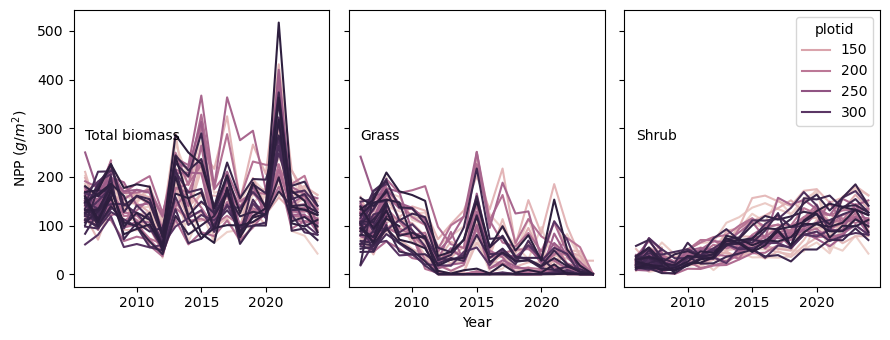

In [9]:
# Plot the ANPP data by individual plots

fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=df, ax=ax[0], x="year", y="biomass_total",
                  hue="plotid", legend=False, estimator=None)
a2 = sns.lineplot(data=df, ax=ax[1], x="year", y="biomass_grass",
                  hue="plotid", legend=False, estimator=None)
a3 = sns.lineplot(data=df, ax=ax[2], x="year", y="biomass_shrub",
                  hue="plotid", estimator=None)

a1.set(xlabel=None)
a1.set(ylabel="NPP ($g/m^2$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 275, 'Total biomass' )
a2.text(2006, 275, 'Grass' )
a3.text(2006, 275, 'Shrub' )
plt.tight_layout()

plt.savefig(outpath + '/figs/lt_biomass_3panel.png', dpi=300, facecolor='w')

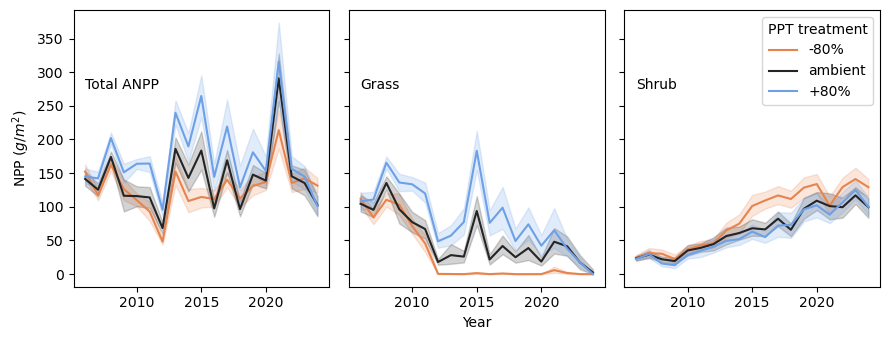

In [10]:
# Plot means
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=df, ax=ax[0], x="year", y="biomass_total",
                  hue="PPT treatment", errorbar=('ci', 95), legend=False)
a2 = sns.lineplot(data=df, ax=ax[1], x="year", y="biomass_grass",
                  hue="PPT treatment", errorbar=('ci', 95), legend=False)
a3 = sns.lineplot(data=df, ax=ax[2], x="year", y="biomass_shrub",
                  hue="PPT treatment", errorbar=('ci', 95))

a1.set(xlabel=None)
a1.set(ylabel="NPP ($g/m^2$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 275, 'Total ANPP' )
a2.text(2006, 275, 'Grass' )
a3.text(2006, 275, 'Shrub' )
plt.tight_layout()

#plt.savefig(outpath + '/figs/lt_biomass_3panel.png', dpi=300, facecolor='w')

In [11]:
# Create dataframe with nitrogen X precip treatments
ndf = df.loc[:,['year','PPT treatment','n_trt',
                'biomass_total','biomass_grass','biomass_shrub']].melt(
    id_vars=['year','PPT treatment','n_trt'],
    value_vars=['biomass_total','biomass_grass','biomass_shrub'])
ndf.head()

,year,PPT treatment,n_trt,variable,value
0,2006,-80%,1,biomass_total,149.910666
1,2006,-80%,0,biomass_total,149.712424
2,2006,-80%,1,biomass_total,128.602374
3,2006,-80%,0,biomass_total,210.280705
4,2006,-80%,0,biomass_total,146.903216


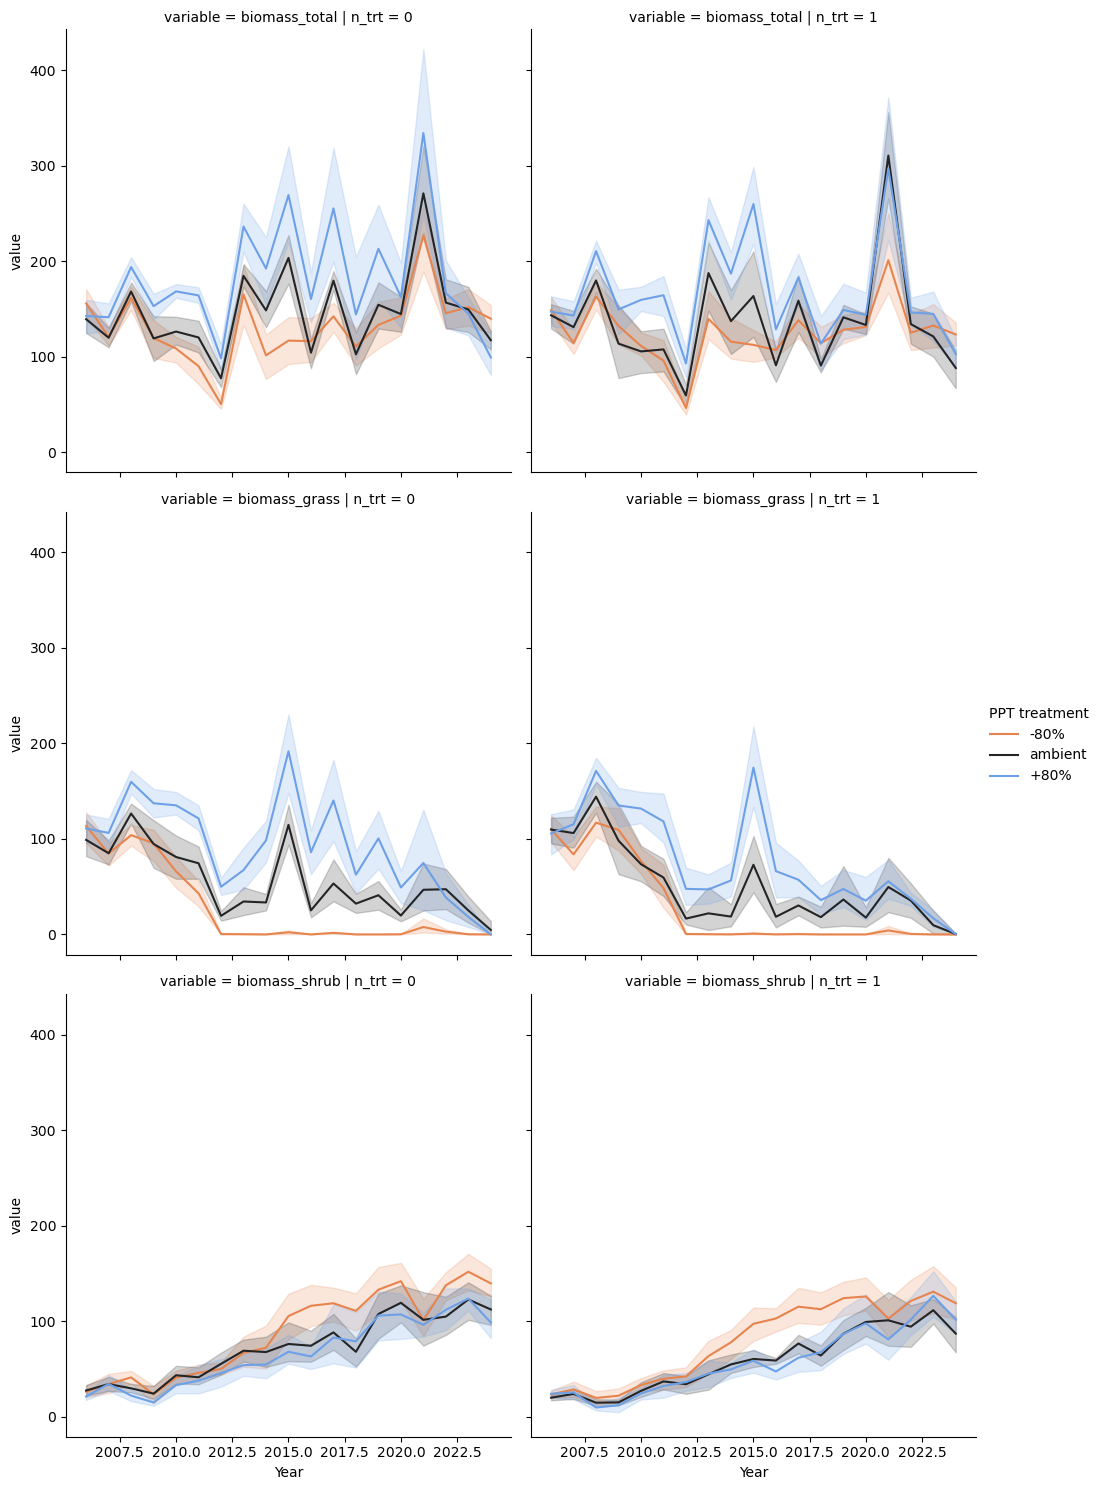

In [12]:
# Plot N x precip treatments
g = sns.relplot(data=ndf, x="year", y="value", hue='PPT treatment',
                kind='line', row='variable',col='n_trt')
g.set(xlabel='Year')

#plt.savefig(outpath + '/figs/lt_biomass_N.png', dpi=300, facecolor='w')

In [13]:
ndf2 = df.loc[:,['year','plotid', 'ppt_trt', 'PPT treatment','n_trt',
                'biomass_total','biomass_grass','biomass_shrub']].melt(
    id_vars=['year','plotid', 'ppt_trt', 'PPT treatment','n_trt'],
    value_vars=['biomass_total','biomass_grass','biomass_shrub'])
ndf2.head()
ndf2 = ndf2.pivot_table(index=['year', 'ppt_trt', 'PPT treatment','variable'],
                        columns='n_trt',values='value').reset_index()
w_dict = {1:'+N', 0:'Control'}
ndf2.rename(columns=w_dict, inplace=True)
ndf2

n_trt,year,ppt_trt,PPT treatment,variable,Control,+N
0,2006,0.2,-80%,biomass_grass,113.509356,110.108215
1,2006,0.2,-80%,biomass_shrub,26.082952,23.165624
2,2006,0.2,-80%,biomass_total,155.813599,148.864880
3,2006,1.0,ambient,biomass_grass,98.969057,109.823982
4,2006,1.0,ambient,biomass_shrub,27.323037,19.784813
...,...,...,...,...,...,...
166,2024,1.0,ambient,biomass_shrub,112.183942,86.894220
167,2024,1.0,ambient,biomass_total,117.274658,88.170487
168,2024,1.8,+80%,biomass_grass,0.000000,0.273595
169,2024,1.8,+80%,biomass_shrub,98.511111,101.340238


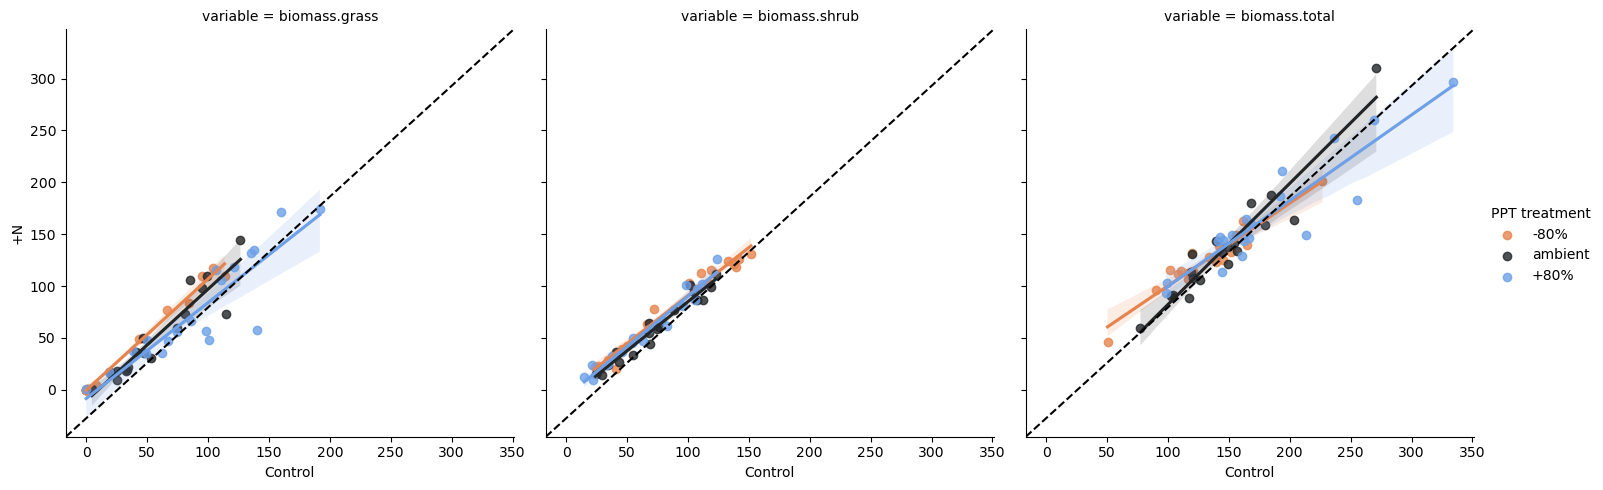

In [11]:
g = sns.lmplot(data=ndf2, x='Control', y='+N', hue='PPT treatment',
               col='variable')
g.set(xlabel='Control')
g.set(ylabel='+N')
#a1.set(ylabel="NPP relative\nto ambient ($g/m^2$)")
#a2.set(xlabel='Year')
#a3.set(xlabel=None)
#a1.text(2006, 175, 'Total biomass' )
#a2.text(2006, 175, 'Grass' )
#a3.text(2006, 175, 'Shrub' )
#plt.tight_layout()
ax1,ax2,ax3 = g.axes[0]
#g.map(plt.plot([0, 1], [0, 1], transform=ax1.transAxes, ls='--', c='red'))
ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, ls='--', c='k')
ax2.plot([0, 1], [0, 1], transform=ax2.transAxes, ls='--', c='k')
ax3.plot([0, 1], [0, 1], transform=ax3.transAxes, ls='--', c='k')

#plt.savefig(outpath + '/figs/lt_biomasscomp_N.png', dpi=300, facecolor='w')

In [12]:
# Calculate mean and quantiles (drop wcat first)
means, q975, q025 = ld.ppt_trt_rel_means(df.drop('PPT treatment', axis=1))

In [ ]:
means.head()

In [ ]:
q975.head()

/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_58967/2493425150.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="rbiomass.shrub",


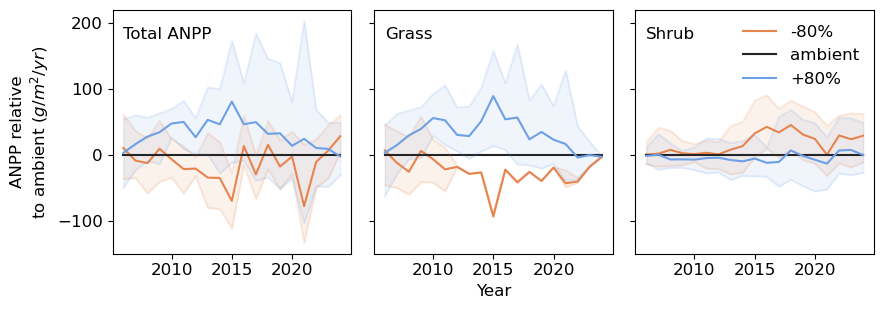

In [13]:
# Re-create a categorical column for plotting
w_dict = {1.0:'-80%', 3.0:'ambient', 5.0:'+80%'}
means['PPT treatment'] = means.ppt_trt.replace(w_dict)

plt.rcParams.update({'font.size':12})


# Function to add confidence intervals
def get_r_ci(var, ax):
    lowerval = means[var] - q025[var]
    lower1 = means.loc[means.ppt_trt==1.,'r'+var] - lowerval[means.ppt_trt==1.]
    #lower3 = means.loc[means.ppt_trt==3.,'r'+var] - lowerval[means.ppt_trt==3.]
    lower5 = means.loc[means.ppt_trt==5.,'r'+var] - lowerval[means.ppt_trt==5.]
    ax.plot(means.year[means.ppt_trt==1.], lower1, color=p[0], alpha=0.1)
    #ax.plot(means.year[means.ppt_trt==3.], lower3, color=p[1], alpha=0.1)
    ax.plot(means.year[means.ppt_trt==5.], lower5, color=p[2], alpha=0.1)
    upperval = q975[var] - means[var]
    upper1 = means.loc[means.ppt_trt==1.,'r'+var] + upperval[means.ppt_trt==1.]
    #upper3 = means.loc[means.ppt_trt==3.,'r'+var] + upperval[means.ppt_trt==3.]
    upper5 = means.loc[means.ppt_trt==5.,'r'+var] + upperval[means.ppt_trt==5.]
    ax.plot(means.year[means.ppt_trt==1.], upper1, color=p[0], alpha=0.1)
    #ax.plot(means.year[means.ppt_trt==3.], upper3, color=p[1], alpha=0.1)
    ax.plot(means.year[means.ppt_trt==5.], upper5, color=p[2], alpha=0.1)
    ax.fill_between(means.year[means.ppt_trt==1.], lower1, upper1,
                    color=p[0], alpha=0.1)
    #ax.fill_between(means.year[means.ppt_trt==3.], lower3, upper3,
    #                color=p[1], alpha=0.1)
    ax.fill_between(means.year[means.ppt_trt==5.], lower5, upper5,
                    color=p[2], alpha=0.1)

#def getrupper(var)
#upper = q975['biomass_total'] - means['biomass_total']

fig, ax = plt.subplots(1, 3, figsize=(9,3.25), sharey=True)
a1 = sns.lineplot(data=means, ax=ax[0], x="year", y="rbiomass_total",
                  hue="PPT treatment", legend=False)
get_r_ci("biomass_total", a1)
a2 = sns.lineplot(data=means, ax=ax[1], x="year", y="rbiomass_grass",
                  hue="PPT treatment", legend=False)
get_r_ci("biomass_grass", a2)
a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="rbiomass_shrub",
                  hue="PPT treatment", ci=95)
get_r_ci("biomass_shrub", a3)
a1.set(xlabel=None)
a1.set(ylabel="ANPP relative\nto ambient ($g/m^2/yr$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 175, 'Total ANPP' )
a2.text(2006, 175, 'Grass' )
a3.text(2006, 175, 'Shrub' )
plt.legend(loc='upper right', framealpha=0.0)
plt.tight_layout()

plt.savefig(outpath + '/figs/lt_relbiomass_3panel_largefont.jpg', dpi=400, facecolor='w')

In [14]:
from importlib import reload
reload(ld)

#pptpath = '~/Dropbox/Repository Remodel Complete architecture/Sala Lab Projects/Projects Currently In Operation/Long Term/Climate_data/Precip_2007-2019'
pptpath = '~/Dropbox/Repository Remodel Complete architecture/Sala Lab Projects/Projects Currently In Operation/Long Term/Climate_data/Precip_2007-Present'
#ann_ppt = ld.load_LT_precip(pptpath, 'annual').melt(id_vars=['year'],
#    value_vars=['-80%','ambient','+80%'], var_name='PPT treatment',
#    value_name = 'ann_PPT_mm')
#gs_ppt = ld.load_LT_precip(pptpath, 'gs').melt(id_vars=['year'],
#    value_vars=['-80%','ambient','+80%'], var_name='PPT treatment',
#    value_name = 'gs_PPT_mm')
all_ppt = ld.load_LT_precip(pptpath, 'all')

gs_ppt = all_ppt[1].melt(id_vars=['year'],
    value_vars=['-80%','ambient','+80%'], var_name='PPT treatment',
    value_name = 'gs_PPT_mm')
ann_ppt = all_ppt[0].melt(id_vars=['year'],
    value_vars=['-80%','ambient','+80%'], var_name='PPT treatment',
    value_name = 'ann_PPT_mm')

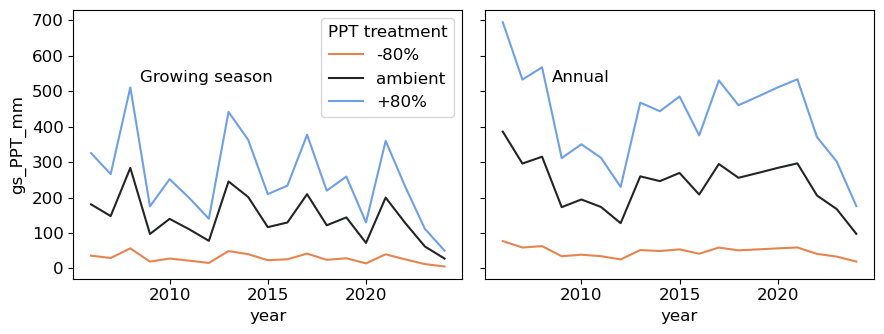

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=gs_ppt, ax=ax[0], x="year", y="gs_PPT_mm",
                  hue="PPT treatment", legend=True)
a2 = sns.lineplot(data=ann_ppt, ax=ax[1], x="year", y="ann_PPT_mm",
                  hue="PPT treatment", legend=False)
a1.text(2008.5, 525, 'Growing season' )
a2.text(2008.5, 525, 'Annual' )
plt.tight_layout()

plt.savefig(outpath + '/figs/lt_precip.png', dpi=300, facecolor='w')

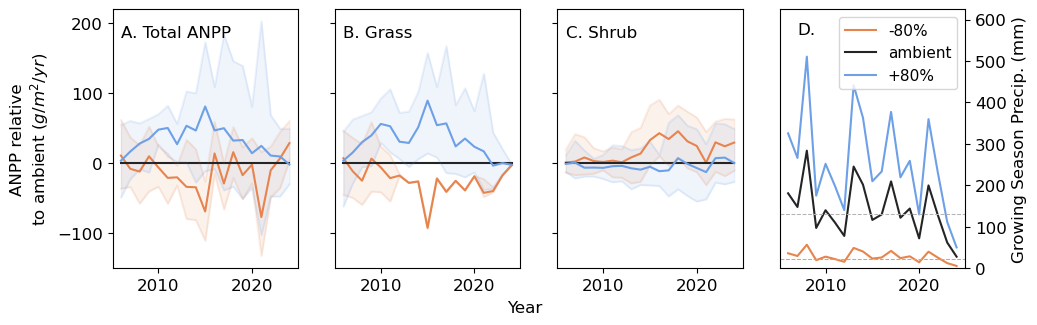

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(11,3.5))
a1 = sns.lineplot(data=means, ax=ax[0], x="year", y="rbiomass_total",
                  hue="PPT treatment", legend=False)
a1.set_ylim(-150, 220)
get_r_ci("biomass_total", a1)
a2 = sns.lineplot(data=means, ax=ax[1], x="year", y="rbiomass_grass",
                  hue="PPT treatment", legend=False)
a2.set_ylim(-150, 220)
get_r_ci("biomass_grass", a2)
a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="rbiomass_shrub",
                  hue="PPT treatment", errorbar=('ci', 95),legend=False)
a3.set_ylim(-150, 220)
get_r_ci("biomass_shrub", a3)

a1.set(ylabel="ANPP relative\nto ambient ($g/m^2/yr$)")
a2.set(ylabel=None, yticklabels=[])
a3.set(ylabel=None, yticklabels=[])
a1.text(2006, 180, 'A. Total ANPP' )
a2.text(2006, 180, 'B. Grass' )
a3.text(2006, 180, 'C. Shrub' )


a4 = sns.lineplot(data=gs_ppt, ax=ax[3], x="year", y="gs_PPT_mm",
                  hue="PPT treatment")
a4.set_ylim(0, 625)
a4.set(ylabel='Growing Season Precip. (mm)')
a4.yaxis.set_label_position("right")
a4.yaxis.tick_right()
a4.legend(loc=1, prop={'size': 11})
a4.text(2007, 565, 'D.' )

# 1/100 without the distribution of yearly precip values is 2.3259 * stdev
# https://en.wikipedia.org/wiki/Standard_deviation#Rules_for_normally_distributed_data
# JER HQ 100 year precip data are in the data folder
ppt_mu = 131.296
ppt_sigma = 55.493
centurydrought = ppt_mu - (ppt_sigma * 2.32636) # This is a 1 in 100 year drought
fortyyrdrought = ppt_mu - (ppt_sigma * 1.959964) # This is a 1 in 40 yr drought
# Plot the mean and drought lines
plt.axhline(y=ppt_mu, color='0.7', linestyle='--', lw=0.75)
#plt.axhline(y=centurydrought, color='0.7', linestyle='--', lw=0.75)
plt.axhline(y=fortyyrdrought, color='orange', linestyle='--', lw=0.75)

a1.set(xlabel=None)
a2.set(xlabel=None)
a3.set(xlabel=None)
a4.set(xlabel=None)

fig.text(0.5, 0.015, 'Year', ha='center')
#plt.tight_layout()
plt.subplots_adjust(bottom=0.14)



plt.savefig(outpath + '/figs/fig1.jpg', dpi=400, facecolor='w', )

In [37]:
print(fortyyrdrought)
centurydrought

22.53171774799999


2.19930451999997

In [17]:
means = means.merge(gs_ppt, how='left', on=['year', 'PPT treatment'])
means = means.merge(ann_ppt, how='left', on=['year', 'PPT treatment'])

In [18]:
means.head()

,year,ppt_trt,plotid,n_trt,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,biomass.total,cover.total,rbiomass.grass,rbiomass.shrub,rbiomass.total,PPT treatment,gs_PPT_mm,ann_PPT_mm
0,2006,1.0,222.333333,0.500000,111.808785,16.597739,24.624288,0.422622,0.089907,0.133385,152.339239,0.642168,7.257196,1.178052,10.941535,-80%,36.1696,77.1652
1,2006,3.0,221.857143,0.514286,104.551590,15.128896,23.446236,0.395190,0.081951,0.127004,141.397705,0.594779,0.000000,0.000000,0.000000,ambient,180.8480,385.8260
2,2006,5.0,220.739130,0.521739,108.235510,14.240695,22.539850,0.409115,0.077139,0.122094,145.016056,0.608349,3.683920,-0.906386,3.618351,+80%,325.5264,694.4868
3,2007,1.0,222.333333,0.500000,84.205973,3.154509,31.289812,0.318287,0.017087,0.169491,117.467353,0.498458,-11.338193,2.386272,-7.980511,-80%,29.5656,59.1820
4,2007,3.0,221.555556,0.500000,95.544166,1.714556,28.903541,0.361144,0.009287,0.156565,125.447865,0.523127,0.000000,0.000000,0.000000,ambient,147.8280,295.9100


In [19]:
# Calculate rain use efficiencies
means['RUEgs_r_shrub'] = means['rbiomass_shrub']/means['gs_PPT_mm']
means['RUEann_r_shrub'] = means['rbiomass_shrub']/means['ann_PPT_mm']
means['RUEgs_r_grass'] = means['rbiomass_grass']/means['gs_PPT_mm']
means['RUEann_r_grass'] = means['rbiomass_grass']/means['ann_PPT_mm']
means['RUEgs_r_tot'] = means['rbiomass_total']/means['gs_PPT_mm']
means['RUEann_r_tot'] = means['rbiomass_total']/means['ann_PPT_mm']

means['RUEgs_shrub'] = means['biomass_shrub']/means['gs_PPT_mm']
means['RUEann_shrub'] = means['biomass_shrub']/means['ann_PPT_mm']
means['RUEgs_grass'] = means['biomass_grass']/means['gs_PPT_mm']
means['RUEann_grass'] = means['biomass_grass']/means['ann_PPT_mm']
means['RUEgs_tot'] = means['biomass_total']/means['gs_PPT_mm']
means['RUEann_tot'] = means['biomass_total']/means['ann_PPT_mm']

## Rain use efficiency

/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_58967/4062073630.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEgs_shrub",


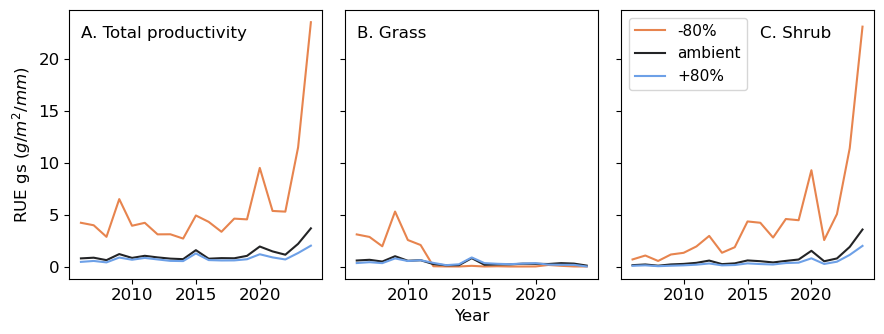

In [23]:
#def getrupper(var)
#upper = q975['biomass_total'] - means['biomass_total']

fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=means, ax=ax[0], x="year", y="RUEgs_tot",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_total", a1)

a2 = sns.lineplot(data=means, ax=ax[1], x="year", y="RUEgs_grass",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_grass", a2)

a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEgs_shrub",
                  hue="PPT treatment", ci=95)
#get_r_ci("biomass_shrub", a3)

a1.set(xlabel=None)
a1.set(ylabel="RUE gs ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2006, 22, 'A. Total productivity' )
a2.text(2006, 22, 'B. Grass' )
a3.text(2016, 22, 'C. Shrub' )
a3.legend(loc=2, prop={'size': 11})
plt.tight_layout()

plt.savefig(outpath + '/figs/fig3.jpg', dpi=400, facecolor='w')

/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_28463/4197487110.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEann_shrub",


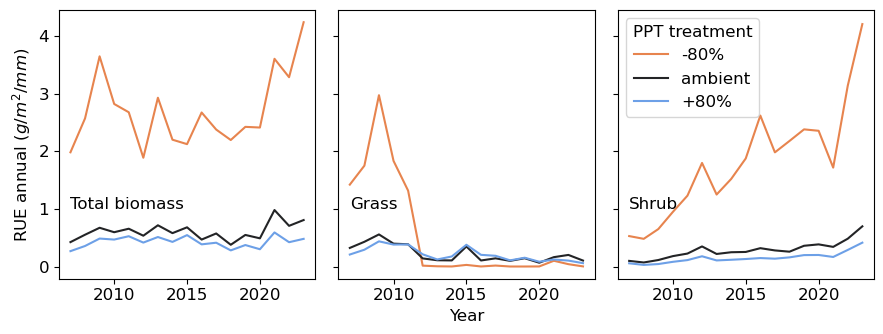

In [45]:
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=means, ax=ax[0], x="year", y="RUEann_tot",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_total", a1)

a2 = sns.lineplot(data=means, ax=ax[1], x="year", y="RUEann_grass",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_grass", a2)

a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEann_shrub",
                  hue="PPT treatment", ci=95)
#get_r_ci("biomass_shrub", a3)

a1.set(xlabel=None)
a1.set(ylabel="RUE annual ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2007, 1, 'Total biomass' )
a2.text(2007, 1, 'Grass' )
a3.text(2007, 1, 'Shrub' )
plt.tight_layout()

#plt.savefig(outpath + '/figs/lt_annRUE_3panel.png', dpi=300, facecolor='w')

## Relative rain use efficiency

/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_28463/2444149205.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEgs_r_shrub",


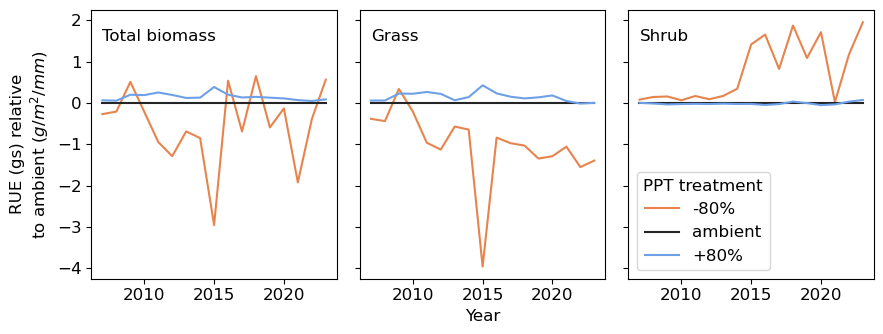

In [46]:
#def getrupper(var)
#upper = q975['biomass_total'] - means['biomass_total']

fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=means, ax=ax[0], x="year", y="RUEgs_r_tot",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_total", a1)

a2 = sns.lineplot(data=means, ax=ax[1], x="year", y="RUEgs_r_grass",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_grass", a2)

a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEgs_r_shrub",
                  hue="PPT treatment", ci=95)
#get_r_ci("biomass_shrub", a3)

a1.set(xlabel=None)
a1.set(ylabel="RUE (gs) relative\nto ambient ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2007, 1.5, 'Total biomass' )
a2.text(2007, 1.5, 'Grass' )
a3.text(2007, 1.5, 'Shrub' )
plt.tight_layout()

#plt.savefig(outpath + '/figs/lt_gsRUErelbiomass_3panel.png', dpi=300, facecolor='w')

/var/folders/wj/7fgjbm815wl1ht4n6vcz7jlr0000gn/T/ipykernel_28463/2757815739.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEann_r_shrub",


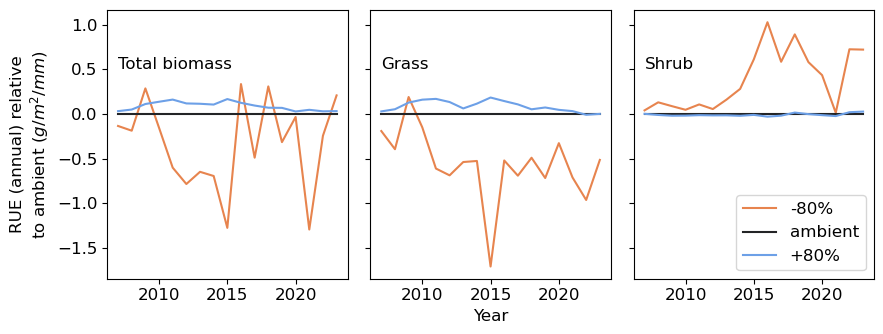

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=means, ax=ax[0], x="year", y="RUEann_r_tot",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_total", a1)

a2 = sns.lineplot(data=means, ax=ax[1], x="year", y="RUEann_r_grass",
                  hue="PPT treatment", legend=False)
#get_r_ci("biomass_grass", a2)

a3 = sns.lineplot(data=means, ax=ax[2], x="year", y="RUEann_r_shrub",
                  hue="PPT treatment", ci=95)
#get_r_ci("biomass_shrub", a3)

a1.set(xlabel=None)
a1.set(ylabel="RUE (annual) relative\nto ambient ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2007, 0.5, 'Total biomass' )
a2.text(2007, 0.5, 'Grass' )
a3.text(2007, 0.5, 'Shrub' )
plt.tight_layout()
plt.legend(loc='lower right')

#plt.savefig(outpath + '/figs/lt_annRUErelbiomass_3panel.png', dpi=300, facecolor='w')

In [48]:
# Calculate shrub ratio for mean data
means['shrubratio'] = means['biomass_shrub']/means['biomass_total']
# Merge precip data with plot data and calculate shrub ratio and RUE
df = df.merge(ann_ppt, how='left', on=['year', 'PPT treatment'])
df = df.merge(gs_ppt, how='left', on=['year', 'PPT treatment'])
df['shrubratio'] = df['biomass_shrub']/df['biomass_total']
df['RUEann_tot'] = df['biomass_total']/df['ann_PPT_mm']
df['RUEgs_tot'] = df['biomass_total']/df['gs_PPT_mm']
df['RUEgs_shrub'] = df['biomass_shrub']/df['gs_PPT_mm']
df['RUEgs_grass'] = df['biomass_grass']/df['gs_PPT_mm']

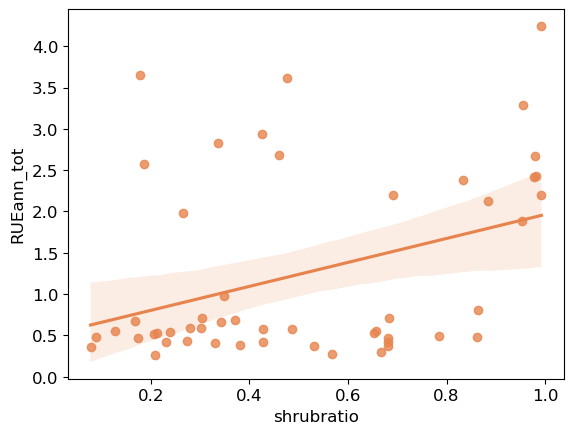

In [49]:
g = sns.regplot(data=means, x='shrubratio', y='RUEann_tot')


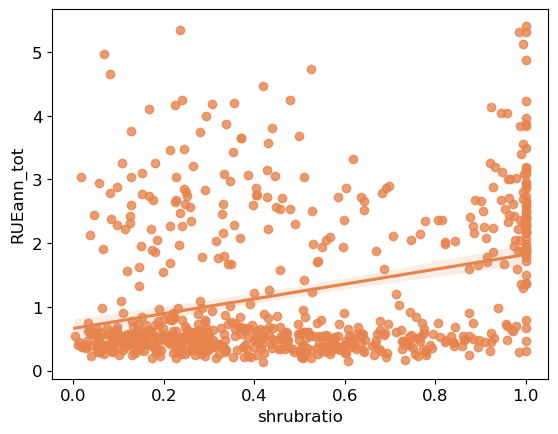

In [50]:
g2 = sns.regplot(data=df, x='shrubratio', y='RUEann_tot')


In [51]:
df.tail()

,year,plotid,ppt_trt,n_trt,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,biomass.total,cover.total,PPT treatment,ann_PPT_mm,gs_PPT_mm,shrubratio,RUEann_tot,RUEgs_tot,RUEgs_shrub,RUEgs_grass
822,2024,236.0,5.0,1,0.0,0.0,103.600597,0.0,0.0,0.561186,103.600597,0.585904,+80%,NaN,NaN,1.0,NaN,NaN,NaN,NaN
823,2024,310.0,5.0,1,0.0,0.0,80.876762,0.0,0.0,0.438095,80.876762,0.509524,+80%,NaN,NaN,1.0,NaN,NaN,NaN,NaN
824,2024,326.0,5.0,0,0.0,0.0,70.114505,0.0,0.0,0.379798,70.114505,0.379798,+80%,NaN,NaN,1.0,NaN,NaN,NaN,NaN
825,2024,329.0,5.0,1,0.0,0.0,140.974909,0.0,0.0,0.763636,140.974909,0.871212,+80%,NaN,NaN,1.0,NaN,NaN,NaN,NaN
826,2024,341.0,5.0,0,0.0,0.0,86.206555,0.0,0.0,0.466966,86.206555,0.595662,+80%,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [52]:
df.loc[df.year>2016, 'RUEgs_tot']

539    3.812037
540    3.525206
541    3.673075
542    3.247283
543    2.865183
         ...   
822         NaN
823         NaN
824         NaN
825         NaN
826         NaN
Name: RUEgs_tot, Length: 288, dtype: float64

In [53]:
# Fit a curve to the RUE data
import numpy as np
import scipy.optimize as so
def expfit(x, a, b, c):
    y = a * np.exp(b*x) + c
    return y
# For growing season RUE
xtest = np.logical_and(df.year>2016, ~df.RUEgs_tot.isna())
xdata = df.loc[xtest, 'shrubratio']
ydata = df.loc[xtest, 'RUEgs_tot']
fittedgs, x = so.curve_fit(expfit, xdata, ydata)#, p0=[0.005, 0.003, 5])
fittedgs
# For annual RUE
xtest = np.logical_and(df.year>2016, ~df.RUEann_tot.isna())
xdata = df.loc[xtest, 'shrubratio']
ydata = df.loc[xtest, 'RUEann_tot']
fittedann, x = so.curve_fit(expfit, xdata, ydata)#, p0=[0.005, 0.003, 5])
fittedann

array([6.63638896e-06, 1.25753971e+01, 7.97182165e-01])

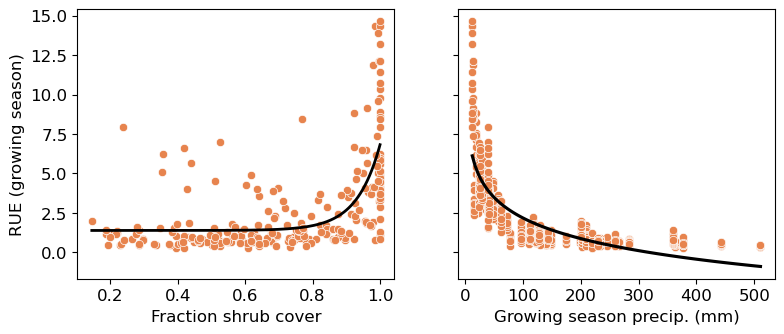

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(9,3.5), sharey=True)

a1 = sns.scatterplot(data=df[df.year>2016], x='shrubratio', y='RUEgs_tot',
                  ax=ax[0])
modelx = np.linspace(xdata.min(),xdata.max(), 250)
ax[0].plot(modelx, expfit(modelx, *fittedgs), 'k-', lw=2,
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(fittedgs))
ax[0].set_ylabel('RUE (growing season)')
ax[0].set_xlabel('Fraction shrub cover')

sns.scatterplot(data=df, x='gs_PPT_mm', y='RUEgs_tot',
                ax=ax[1])
sns.regplot(data=df, x='gs_PPT_mm', y='RUEgs_tot', ax=ax[1], logx=True, ci=False,
            scatter=False, line_kws={"color": "black"})
ax[1].set_xlabel('Growing season precip. (mm)')
plt.savefig(outpath + '/figs/gsRUE_shrub_precip.png', dpi=300, facecolor='w')

In [55]:
df.head()

,year,plotid,ppt_trt,n_trt,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,biomass.total,cover.total,PPT treatment,ann_PPT_mm,gs_PPT_mm,shrubratio,RUEann_tot,RUEgs_tot,RUEgs_shrub,RUEgs_grass
0,2006,104.0,1.0,1,126.837137,3.382477,19.691052,0.479427,0.018322,0.106663,149.910666,0.604412,-80%,NaN,NaN,0.131352,NaN,NaN,NaN,NaN
1,2006,108.0,1.0,0,104.617012,21.647286,23.448126,0.395438,0.117260,0.127014,149.712424,0.639712,-80%,NaN,NaN,0.156621,NaN,NaN,NaN,NaN
2,2006,114.0,1.0,1,87.407128,24.078834,17.116412,0.330387,0.130431,0.092717,128.602374,0.553534,-80%,NaN,NaN,0.133096,NaN,NaN,NaN,NaN
3,2006,126.0,1.0,0,122.057969,36.484190,51.738546,0.461362,0.197628,0.280259,210.280705,0.939249,-80%,NaN,NaN,0.246045,NaN,NaN,NaN,NaN
4,2006,134.0,1.0,0,121.311130,18.787405,6.804681,0.458539,0.101768,0.036860,146.903216,0.597167,-80%,NaN,NaN,0.046321,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Shrub biomass')

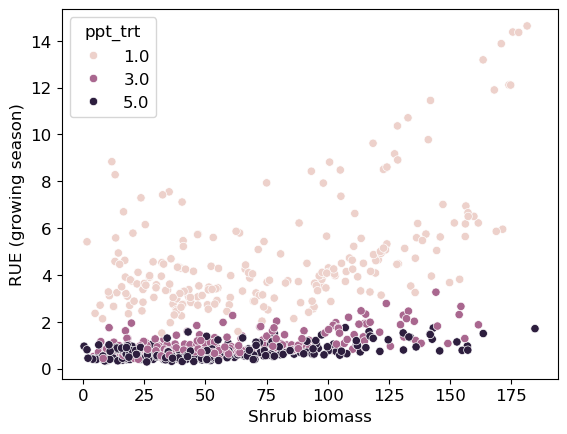

In [56]:
g3 = sns.scatterplot(data=df[df.year>2006], x='biomass_shrub', y='RUEgs_tot', hue='ppt_trt')
#modelx = np.linspace(xdata.min(),xdata.max(), 250)
#plt.plot(modelx, expfit(modelx, *fittedgs), 'k-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(fittedgs))
plt.ylabel('RUE (growing season)')
plt.xlabel('Shrub biomass')
#logx=True, line_kws={"color": "black"})
#plt.savefig(outpath + '/figs/gsRUEvsShrubRatio2016+.png', dpi=300, facecolor='w')

Text(0.5, 0, 'Fraction shrub biomass')

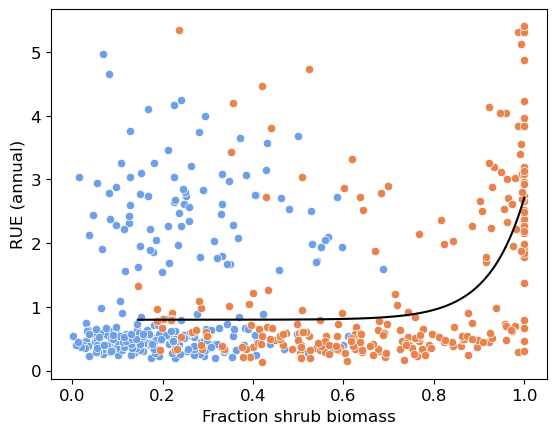

In [57]:
# Data for original figure showing 2 distinct states was partitioned as below. (2017-2020)
#g3a = sns.scatterplot(data=df[np.logical_and(df.year>2016, df.year < 2021)], x='shrubratio', y='RUEann_tot', color=p[2])
g3a = sns.scatterplot(data=df[df.year < 2012], x='shrubratio', y='RUEann_tot', color=p[2])
sns.scatterplot(data=df[df.year > 2016], x='shrubratio', y='RUEann_tot', color=p[0])
modelx = np.linspace(xdata.min(),xdata.max(), 250)
plt.plot(modelx, expfit(modelx, *fittedann), 'k-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(fittedann))
plt.ylabel('RUE (annual)')
plt.xlabel('Fraction shrub biomass')
#logx=True, line_kws={"color": "black"})
#plt.savefig(outpath + '/figs/annRUEvsShrubRatio2016+.png', dpi=300, facecolor='w')

In [58]:
def logifunc(x,A,x0,k,off):
    return A / (1 + np.exp(-k*(x-x0)))+off
# For growing season RUE
xtest = np.logical_and(df.year>2016, ~df.RUEgs_tot.isna())
xdata = df.loc[xtest, 'shrubratio']
ydata = df.loc[xtest, 'RUEgs_tot']
fittedgs2, x = so.curve_fit(logifunc, xdata, ydata)#, p0=[0.005, 0.003, 5])
fittedgs2

/Users/Shared/miniconda3/envs/gc_ltreb/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([ 8.5255902 ,  0.97935394, 24.27947211,  1.43406822])

<Axes: xlabel='gs_PPT_mm', ylabel='RUEgs_tot'>

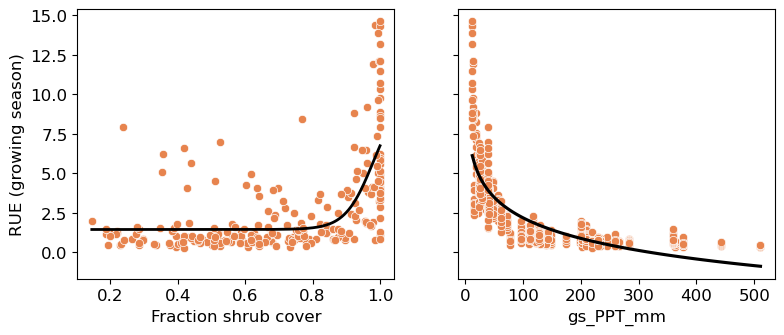

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(9,3.5), sharey=True)
a1 = sns.scatterplot(data=df[df.year>2016], x='shrubratio', y='RUEgs_tot',
                  ax=ax[0])
modelx = np.linspace(xdata.min(),xdata.max(), 250)
ax[0].plot(modelx, logifunc(modelx, *fittedgs2), 'k-', lw=2,
         label='fit: x=%5.3f, A=%5.3f, x0=%5.3f, k=%5.3f' % tuple(fittedgs2))
ax[0].set_ylabel('RUE (growing season)')
ax[0].set_xlabel('Fraction shrub cover')

sns.scatterplot(data=df, x='gs_PPT_mm', y='RUEgs_tot', ax=ax[1])
sns.regplot(data=df, x='gs_PPT_mm', y='RUEgs_tot', ax=ax[1], logx=True, ci=False,
            scatter=False, line_kws={"color": "black"})

#ax[1].set_xlabel('Growing season precip. (mm)')
#plt.savefig(outpath + '/figs/gsRUE_shrub_precip.png', dpi=300, facecolor='w')

In [60]:
df.head()

,year,plotid,ppt_trt,n_trt,biomass.grass,biomass.rare,biomass.shrub,cover.grass,cover.rare,cover.shrub,biomass.total,cover.total,PPT treatment,ann_PPT_mm,gs_PPT_mm,shrubratio,RUEann_tot,RUEgs_tot,RUEgs_shrub,RUEgs_grass
0,2006,104.0,1.0,1,126.837137,3.382477,19.691052,0.479427,0.018322,0.106663,149.910666,0.604412,-80%,NaN,NaN,0.131352,NaN,NaN,NaN,NaN
1,2006,108.0,1.0,0,104.617012,21.647286,23.448126,0.395438,0.117260,0.127014,149.712424,0.639712,-80%,NaN,NaN,0.156621,NaN,NaN,NaN,NaN
2,2006,114.0,1.0,1,87.407128,24.078834,17.116412,0.330387,0.130431,0.092717,128.602374,0.553534,-80%,NaN,NaN,0.133096,NaN,NaN,NaN,NaN
3,2006,126.0,1.0,0,122.057969,36.484190,51.738546,0.461362,0.197628,0.280259,210.280705,0.939249,-80%,NaN,NaN,0.246045,NaN,NaN,NaN,NaN
4,2006,134.0,1.0,0,121.311130,18.787405,6.804681,0.458539,0.101768,0.036860,146.903216,0.597167,-80%,NaN,NaN,0.046321,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Fraction shrub biomass')

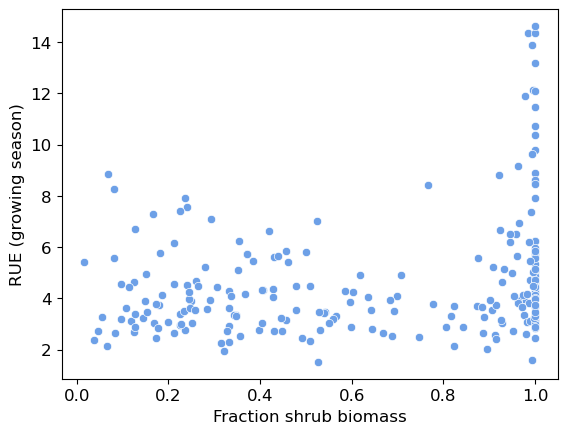

In [61]:
g3 = sns.scatterplot(data=df[df.ppt_trt < 2], x='shrubratio', y='RUEgs_tot', color=p[2])
#modelx = np.linspace(xdata.min(),xdata.max(), 250)
#plt.plot(modelx, logifunc(modelx, *fittedgs2), 'k-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, k=%5.3f' % tuple(fittedgs2))
plt.ylabel('RUE (growing season)')
plt.xlabel('Fraction shrub biomass')
#logx=True, line_kws={"color": "black"})
#plt.savefig(outpath + '/figs/gsRUEvsShrubRatio2016+.png', dpi=300, facecolor='w')

In [ ]:
means

In [62]:
mean_yr = means.groupby('year')[['RUEgs_tot', 'shrubratio']].mean()
mean_yr

,RUEgs_tot,shrubratio
year,,
2006,NaN,0.160963
2007,1.785409,0.235340
2008,1.289596,0.130516
2009,2.851441,0.144414
2010,1.801988,0.270954
2011,2.021926,0.337849
2012,1.551701,0.677182
2013,1.469037,0.312344
2014,1.307648,0.463991


Text(0.5, 0, 'Fraction shrub biomass')

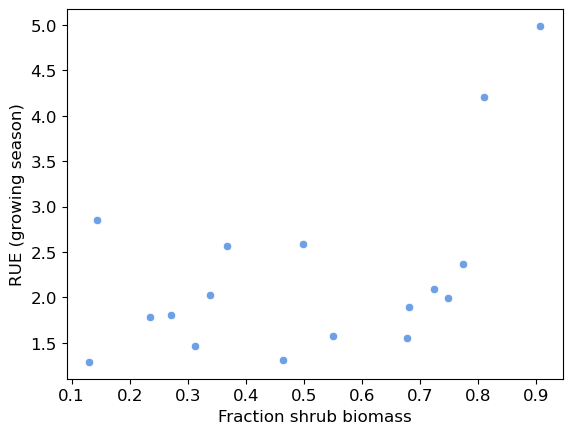

In [63]:
g4 = sns.scatterplot(data=mean_yr, x='shrubratio', y='RUEgs_tot', color=p[2])
#modelx = np.linspace(xdata.min(),xdata.max(), 250)
#plt.plot(modelx, logifunc(modelx, *fittedgs2), 'k-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, k=%5.3f' % tuple(fittedgs2))
plt.ylabel('RUE (growing season)')
plt.xlabel('Fraction shrub biomass')

In [64]:
mean_yrppt = means.groupby(['year','ppt_trt'])[['RUEann_tot', 'RUEgs_tot', 'shrubratio', 'biomass_shrub']].mean().reset_index()
mean_yrppt

,year,ppt_trt,RUEann_tot,RUEgs_tot,shrubratio,biomass.shrub
0,2006,1.0,NaN,NaN,0.161641,24.624288
1,2006,3.0,NaN,NaN,0.165818,23.446236
2,2006,5.0,NaN,NaN,0.155430,22.539850
3,2007,1.0,1.984849,3.973109,0.266370,31.289812
4,2007,3.0,0.423939,0.848607,0.230403,28.903541
5,2007,5.0,0.267027,0.534512,0.209248,29.761087
6,2008,1.0,2.573523,2.859214,0.186880,30.319793
7,2008,3.0,0.552258,0.613565,0.126861,22.083913
8,2008,5.0,0.356439,0.396008,0.077808,15.735708
9,2009,1.0,3.652236,6.493924,0.178098,22.502439


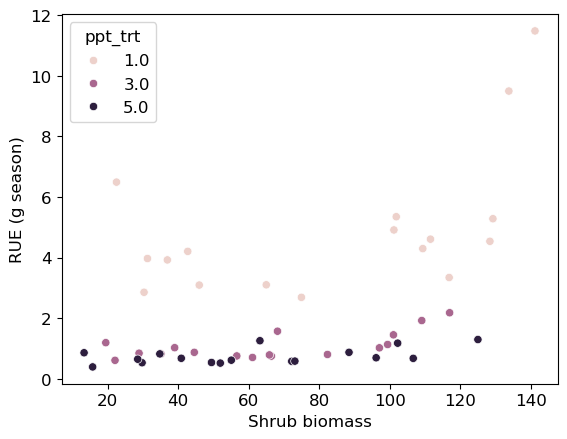

In [65]:
g5 = sns.scatterplot(data=mean_yrppt, x='biomass_shrub', y='RUEgs_tot', hue='ppt_trt')
#modelx = np.linspace(xdata.min(),xdata.max(), 250)
#plt.plot(modelx, logifunc(modelx, *fittedgs2), 'k-',
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, k=%5.3f' % tuple(fittedgs2))
plt.ylabel('RUE (g season)')
plt.xlabel('Shrub biomass')



def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
#label_point(mean_yrppt['shrubratio'], mean_yrppt['RUEgs_tot'], mean_yrppt['year'].astype(str), plt.gca())


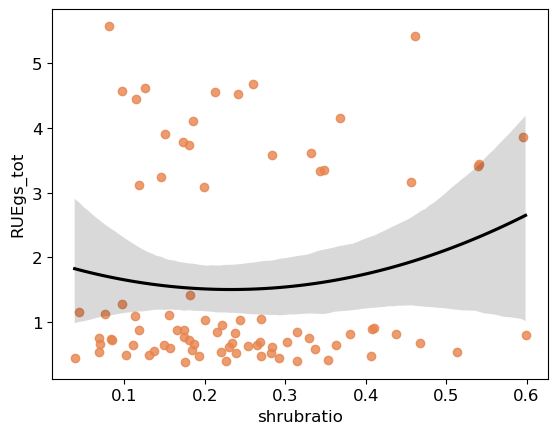

In [66]:
g3 = sns.regplot(data=df[df.year<2008], x='shrubratio', y='RUEgs_tot', order=2, line_kws={"color": "black"})
plt.savefig(outpath + '/figs/gsRUEvsShrubRatio2010-.png', dpi=300, facecolor='w')

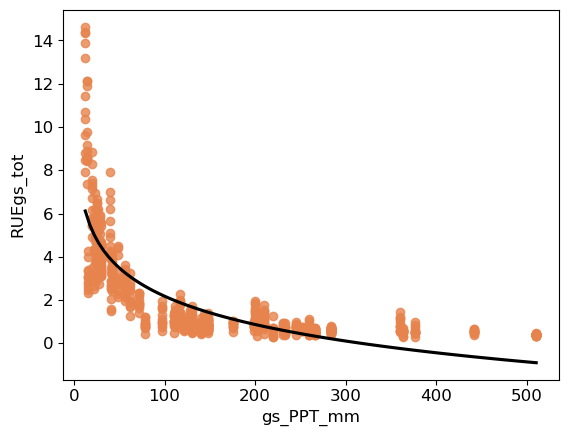

In [67]:
g4 = sns.regplot(data=df, x='gs_PPT_mm', y='RUEgs_tot', logx=True, ci=False,
                 line_kws={"color": "black"})
plt.savefig(outpath + '/figs/gsRUEvsGSppt.png', dpi=300, facecolor='w')

In [69]:
df.head()
df.to_csv(outpath + '/data/reduced_plotlevel_update.csv', index=False)

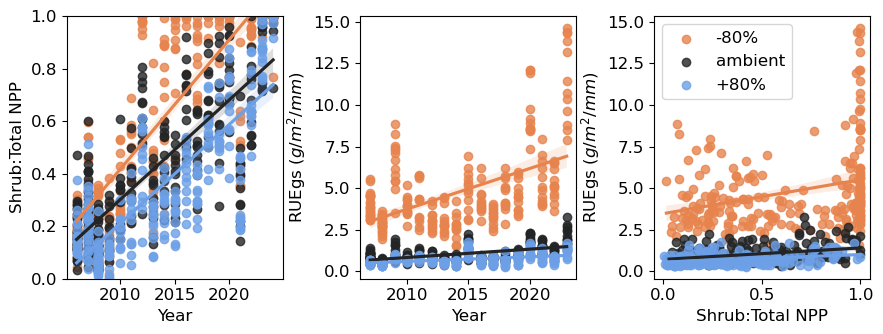

In [70]:
p = sns.diverging_palette(30, 250, l=65, center="dark", n=3)
sns.set_palette(p)
#sns.set_palette("icefire_r", 3, .75)
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharex=False)
#a1 = sns.lineplot(data=df, ax=ax[0], x="year", y="RUEgs_tot",
#                  hue="plot", legend=False, estimator=None)
a1 = sns.regplot(data=df[df['PPT treatment']=="-80%"], ax=ax[0], x="year", y="shrubratio")
a1 = sns.regplot(data=df[df['PPT treatment']=="ambient"], ax=ax[0], x="year", y="shrubratio")
a1 = sns.regplot(data=df[df['PPT treatment']=="+80%"], ax=ax[0], x="year", y="shrubratio")
a1.set(ylim=[0,1])
a2 = sns.regplot(data=df[df['PPT treatment']=="-80%"], ax=ax[1], x="year", y="RUEgs_tot")
a2 = sns.regplot(data=df[df['PPT treatment']=="ambient"], ax=ax[1], x="year", y="RUEgs_tot")
a2 = sns.regplot(data=df[df['PPT treatment']=="+80%"], ax=ax[1], x="year", y="RUEgs_tot")
#a3 = sns.scatterplot(data=df, ax=ax[2], x="shrubratio", y="RUEgs_tot",
#                  hue="PPT treatment", legend=False, estimator=None)
a3 = sns.regplot(data=df[df['PPT treatment']=="-80%"], ax=ax[2], x="shrubratio", y="RUEgs_tot",
                label='-80%')
a3 = sns.regplot(data=df[df['PPT treatment']=="ambient"], ax=ax[2], x="shrubratio", y="RUEgs_tot",
                label='ambient')
a3 = sns.regplot(data=df[df['PPT treatment']=="+80%"], ax=ax[2], x="shrubratio", y="RUEgs_tot",
                label='+80%')
plt.legend()

a1.set(xlabel='Year')
a1.set(ylabel="Shrub:Total NPP")
a2.set(ylabel="RUEgs ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(ylabel="RUEgs ($g/m^2/mm$)")
a3.set(xlabel='Shrub:Total NPP')
#a1.text(2006, 275, 'Total biomass' )
#a2.text(2006, 275, 'Grass' )
#a3.text(2006, 275, 'Shrub' )
plt.tight_layout()

plt.savefig(outpath + '/figs/RUE_shrubratio_3panel.png', dpi=300, facecolor='w')

ValueError: Could not interpret value `plot` for `hue`. An entry with this name does not appear in `data`.

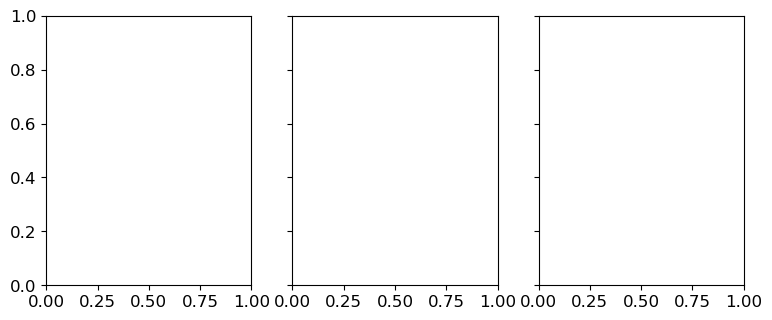

In [71]:
p = sns.diverging_palette(30, 250, l=65, center="dark", n=3)
sns.set_palette(p)
#sns.set_palette("icefire_r", 3, .75)
fig, ax = plt.subplots(1, 3, figsize=(9,3.5), sharey=True)
a1 = sns.lineplot(data=df, ax=ax[0], x="year", y="RUEgs_tot",
                  hue="plot", legend=False, estimator=None)
a2 = sns.lineplot(data=df, ax=ax[1], x="year", y="RUEgs_grass",
                  hue="plot", legend=False, estimator=None)
a3 = sns.lineplot(data=df, ax=ax[2], x="year", y="RUEgs_shrub",
                  hue="plot", estimator=None)

a1.set(xlabel=None)
a1.set(ylabel="RUE ($g/m^2/mm$)")
a2.set(xlabel='Year')
a3.set(xlabel=None)
a1.text(2013, 7.9, 'Total biomass' )
a2.text(2016, 7.9, 'Grass' )
a3.text(2016, 7.9, 'Shrub' )
plt.tight_layout()

plt.savefig(outpath + '/figs/lt_RUE_3panel.png', dpi=300, facecolor='w')